In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pylab import mpl
import seaborn as sns

In [2]:
from matplotlib.font_manager import FontProperties

# 设置字体
font_path = '../SimHei.ttf'  # 替换为你的字体文件路径
font = FontProperties(fname=font_path, size=12)

In [3]:
filepath = 'products_info.xlsx'
df = pd.read_excel(filepath)
print(df)

       产品名称 产品描述  类别  子类别      制造商          成本          单价  2013年卖出  2014年卖出  \
0     个人复印机   彩色  技术  复印机  Brother  497.321905  665.129762        2        0   
1     个人复印机   彩色  技术  复印机  Hewlett  433.173485  673.141667        2        0   
2     个人复印机   彩色  技术  复印机       佳能  461.494762  666.330357        0        3   
3     个人复印机   彩色  技术  复印机       夏普  422.693972  558.507086       11        0   
4     个人复印机   彩色  技术  复印机       惠普  445.372727  578.890152        0        6   
...     ...  ...  ..  ...      ...         ...         ...      ...      ...   
1948     鼠标   耐用  技术   配件  Enermax  170.091349  185.816984        0        3   
1949     鼠标   耐用  技术   配件  Memorex  101.001247  130.952834        4        3   
1950     鼠标   耐用  技术   配件  SanDisk  130.276190  177.258377        2        0   
1951     鼠标   耐用  技术   配件       罗技   91.480392  136.840850        0        4   
1952     鼠标   耐用  技术   配件      贝尔金  145.953992  190.309290        7        1   

      2015年卖出  2016年卖出  2013年利润  2014年利

## 不同类产品的数据特点

In [4]:
labels = ['办公用品', '家具', '技术']
colors = ['#8ECFC9', '#ff8e7a', '#8280d2']
color_dict = {'办公用品':'#8ECFC9', '家具':'#ff8e7a', '技术':'#8280d2'}

### 数量占比

In [5]:
sales_bygroup = df.groupby('类别')[['产品名称']].count()
print(sales_bygroup)

      产品名称
类别        
办公用品  1047
家具     444
技术     462


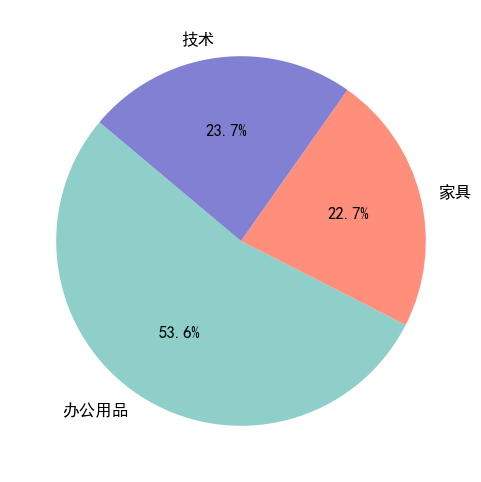

In [6]:
labels = list(sales_bygroup.index.tolist())
count = sales_bygroup['产品名称'].tolist()

# 绘制饼状图
plt.figure(figsize=(6, 6))

wedges, texts, autotexts = plt.pie(count, labels=labels, autopct='%1.1f%%', startangle=140, 
                                   colors=colors,textprops=dict(fontproperties=font))

# 显示图表
plt.show()

/var/folders/kj/nyv_cylx6532skxk06yjfb540000gn/T/ipykernel_82437/1762341111.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontproperties=font)


<Figure size 700x700 with 0 Axes>

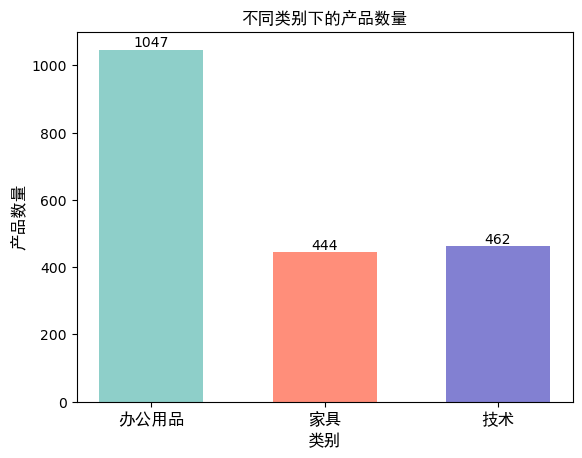

In [7]:
plt.figure(figsize=(7, 7))
fig, ax = plt.subplots()
bars = ax.bar(labels, count, color=colors, width=0.6)

# 设置 x 轴刻度的文本，并为文本设置字体
ax.set_xticklabels(labels, fontproperties=font)
# 添加数值标签
ax.bar_label(bars, labels=count, label_type='edge', color='black', fontsize=10)

ax.set_title('不同类别下的产品数量',fontproperties=font)
ax.set_xlabel('类别',fontproperties=font)
ax.set_ylabel('产品数量',fontproperties=font)

plt.show()

### 销售数量占比

In [8]:
sales_bygroup = df.groupby('类别')[['2013年卖出', '2014年卖出', '2015年卖出', '2016年卖出']].sum()
print(sales_bygroup)

      2013年卖出  2014年卖出  2015年卖出  2016年卖出
类别                                      
办公用品     3855     4509     5645     7380
家具       1514     1893     2085     2942
技术       1309     1578     2140     2586


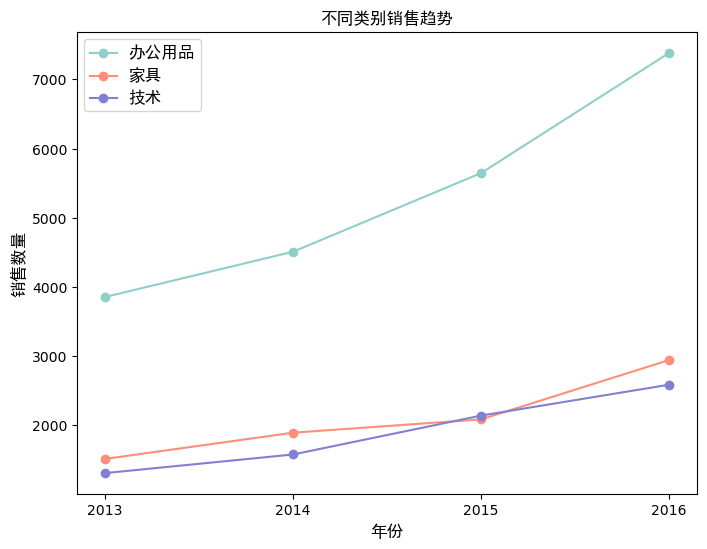

In [9]:
办公用品销售 = sales_bygroup.loc['办公用品'].tolist()
家具销售 = sales_bygroup.loc['家具'].tolist()
技术销售 = sales_bygroup.loc['技术'].tolist()

# 绘制折线图
fig, ax = plt.subplots(figsize=(8, 6))
years = ['2013', '2014', '2015', '2016']

ax.plot(years, 办公用品销售, label='办公用品', marker='o',color=colors[0])
ax.plot(years, 家具销售, label='家具', marker='o',color=colors[1])
ax.plot(years, 技术销售, label='技术', marker='o',color=colors[2])

# 添加标题和标签
ax.set_title('不同类别销售趋势', fontproperties=font)
ax.set_xlabel('年份', fontproperties=font)
ax.set_ylabel('销售数量', fontproperties=font)

legend = ax.legend()
for i in range(0,3):
    label = legend.get_texts()[i]
    label.set_fontproperties(font)

# 显示图表
plt.show()

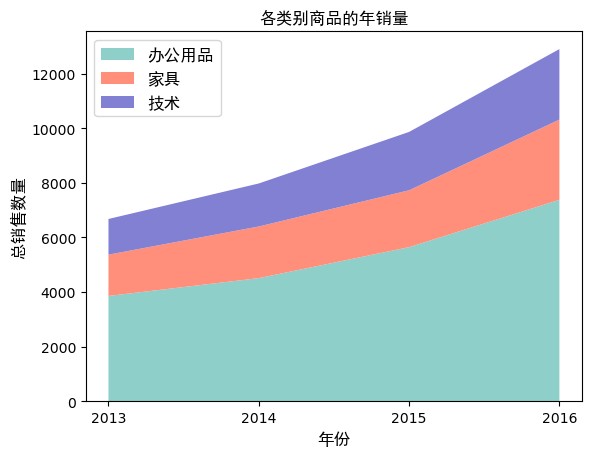

In [19]:
# 创建堆叠式面积图
plt.stackplot(years, 办公用品销售, 家具销售, 技术销售, colors = colors, labels=['办公用品', '家具', '技术'])

# 添加标签和标题
plt.xlabel('年份', fontproperties=font)
plt.ylabel('总销售数量', fontproperties=font)
plt.title('各类别商品的年销量', fontproperties=font)
plt.legend(loc='upper left', prop=font)

# 显示图形
plt.show()

In [21]:
# 计算每个商品的平均售出数量
sales_bygroup.loc['办公用品'] = sales_bygroup.loc['办公用品']/1047
sales_bygroup.loc['家具'] = sales_bygroup.loc['家具']/444
sales_bygroup.loc['技术'] = sales_bygroup.loc['技术']/462

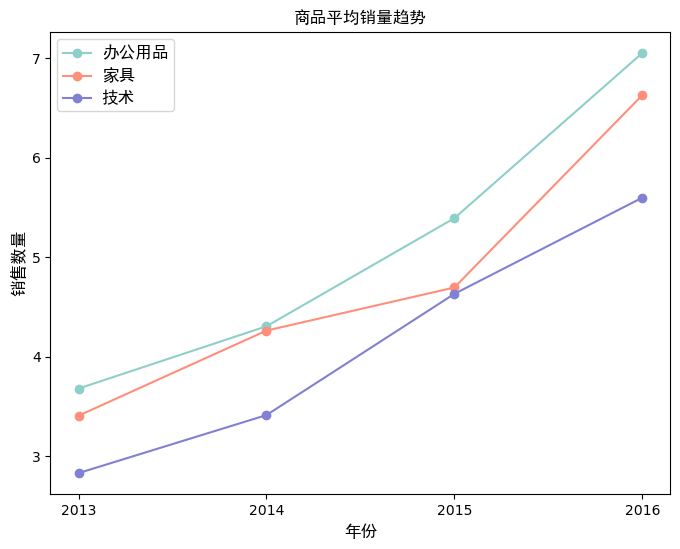

In [22]:
办公用品销售 = sales_bygroup.loc['办公用品'].tolist()
家具销售 = sales_bygroup.loc['家具'].tolist()
技术销售 = sales_bygroup.loc['技术'].tolist()

# 绘制折线图
fig, ax = plt.subplots(figsize=(8, 6))
years = ['2013', '2014', '2015', '2016']

ax.plot(years, 办公用品销售, label='办公用品', marker='o',color=colors[0])
ax.plot(years, 家具销售, label='家具', marker='o',color=colors[1])
ax.plot(years, 技术销售, label='技术', marker='o',color=colors[2])

# 添加标题和标签
ax.set_title('商品平均销量趋势', fontproperties=font)
ax.set_xlabel('年份', fontproperties=font)
ax.set_ylabel('销售数量', fontproperties=font)

legend = ax.legend()
for i in range(0,3):
    label = legend.get_texts()[i]
    label.set_fontproperties(font)

# 显示图表
plt.show()

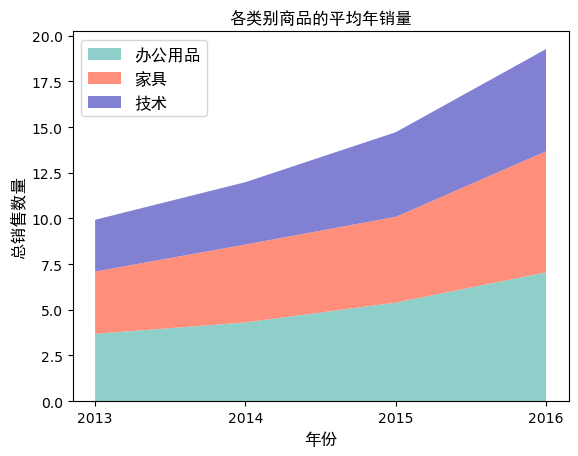

In [23]:
# 创建堆叠式面积图
plt.stackplot(years, 办公用品销售, 家具销售, 技术销售, colors = colors, labels=['办公用品', '家具', '技术'])

# 添加标签和标题
plt.xlabel('年份', fontproperties=font)
plt.ylabel('总销售数量', fontproperties=font)
plt.title('各类别商品的平均年销量', fontproperties=font)
plt.legend(loc='upper left', prop=font)

# 显示图形
plt.show()

In [24]:
sales_bygroup = df.groupby('子类别')[['2013年卖出', '2014年卖出', '2015年卖出', '2016年卖出']].sum()
print(sales_bygroup)

     2013年卖出  2014年卖出  2015年卖出  2016年卖出
子类别                                    
书架       408      517      606      852
信封       404      517      575      780
器具       407      394      585      744
复印机      363      451      627      679
收纳具      542      571      843      980
标签       420      449      514      723
桌子       119      134      124      242
椅子       571      772      758     1043
用具       416      470      597      805
用品       371      496      540      858
电话       418      446      605      705
系固件      376      455      626      802
纸张       386      400      597      674
美术       315      501      514      683
装订机      634      726      851     1136
设备       170      258      328      487
配件       358      423      580      715


In [30]:
categories = sales_bygroup.index.tolist()
values = sales_bygroup.values.tolist()

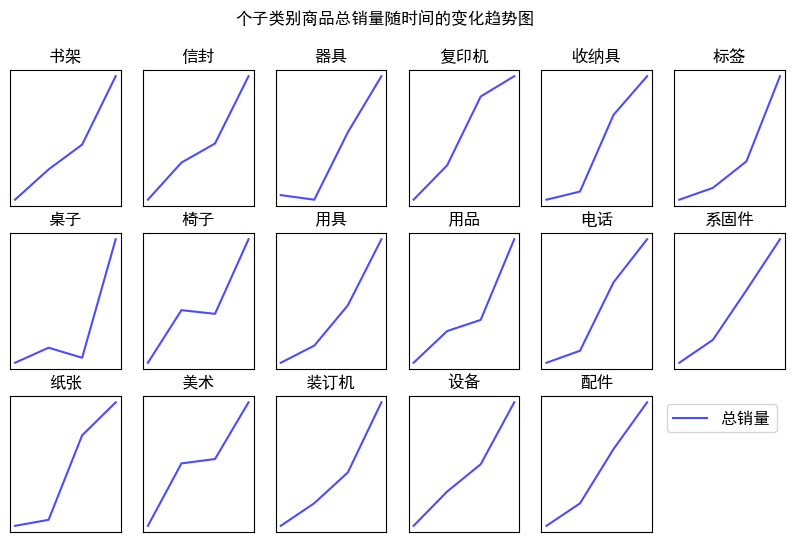

In [43]:
plt.figure(figsize=(10, 6))
plt.suptitle("个子类别商品总销量随时间的变化趋势图", fontproperties=font)
for i in range(len(categories)):
    plt.subplot(3,6,i+1)
    plt.plot(years, values[i],color = 'blue', alpha = 0.7,label='总销量')
    plt.title(categories[i], fontproperties=font)
    plt.yticks([])
    plt.xticks([])
    i += 1
plt.subplot(3,6,18)
plt.plot(0, 0,color = 'blue', alpha = 0.7, label = '总销量')
plt.legend(prop=font)
plt.axis('off')
plt.show()

### 制造商分布

In [25]:
df['制造商'].value_counts()

制造商
Hon                  67
Safco                48
Advantus             48
Avery                48
Harbour Creations    48
                     ..
冲电器                  19
爱普生                  18
Barricks             17
Lesro                16
Bevis                15
Name: count, Length: 72, dtype: int64

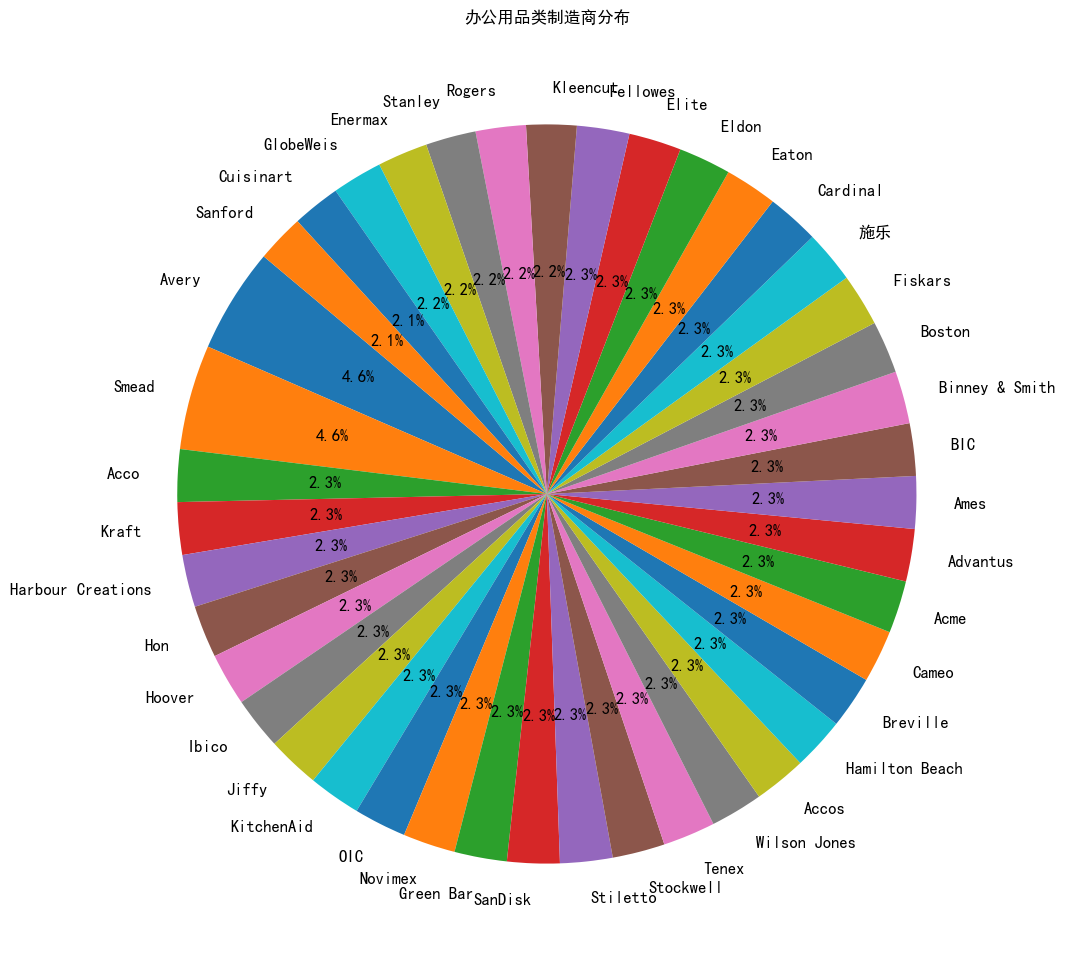

In [35]:
# 计算每个制造商的数量
manufacturer_counts = df[df['类别']=='办公用品']['制造商'].value_counts()

# 设置画布大小
plt.figure(figsize=(12, 12))

# 绘制饼状图
plt.pie(manufacturer_counts, labels=manufacturer_counts.index, autopct='%1.1f%%', startangle=140, textprops=dict(fontproperties=font))

# 添加标题
plt.title('办公用品类制造商分布', fontproperties=font)

# 显示图形
plt.show()

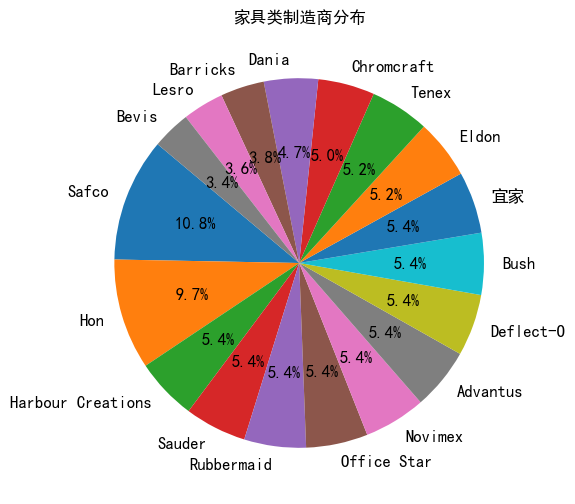

In [29]:
# 计算每个制造商的数量
manufacturer_counts = df[df['类别']=='家具']['制造商'].value_counts()

# 设置画布大小
plt.figure(figsize=(6, 6))

# 绘制饼状图
plt.pie(manufacturer_counts, labels=manufacturer_counts.index, autopct='%1.1f%%', startangle=140, textprops=dict(fontproperties=font))

# 添加标题
plt.title('家具类制造商分布', fontproperties=font)

# 显示图形
plt.show()

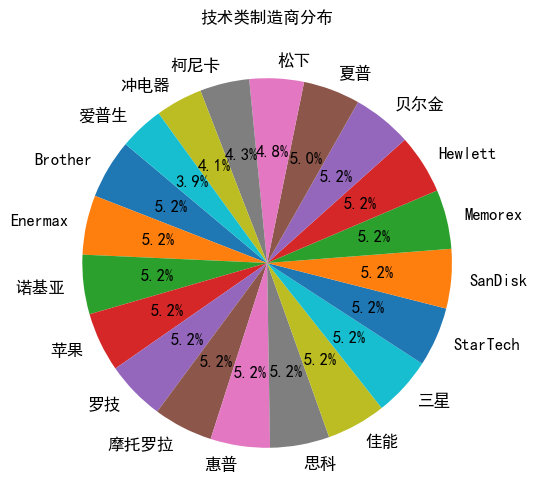

In [36]:
# 计算每个制造商的数量
manufacturer_counts = df[df['类别']=='技术']['制造商'].value_counts()

# 设置画布大小
plt.figure(figsize=(6, 6))

# 绘制饼状图
plt.pie(manufacturer_counts, labels=manufacturer_counts.index, autopct='%1.1f%%', startangle=140, textprops=dict(fontproperties=font))

# 添加标题
plt.title('技术类制造商分布', fontproperties=font)

# 显示图形
plt.show()

## 不同子类别的分布情况

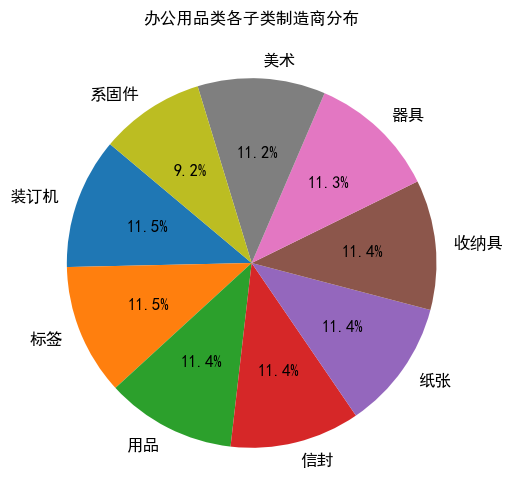

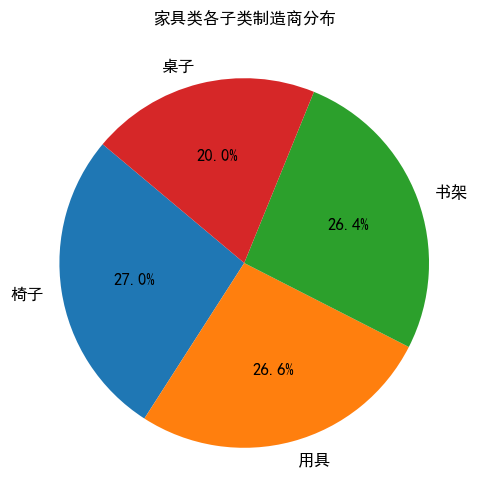

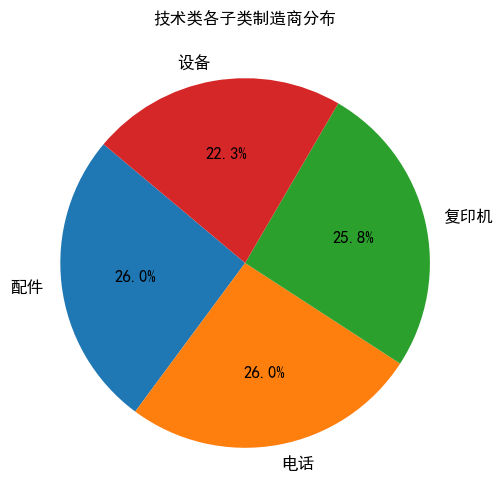

In [65]:
for category in ['办公用品','家具','技术']:
    manufacturer_counts = df[df['类别']==category]['子类别'].value_counts()
    
    plt.figure(figsize=(6, 6))
    plt.pie(manufacturer_counts, labels=manufacturer_counts.index, autopct='%1.1f%%', startangle=140, textprops=dict(fontproperties=font))
    plt.title(category + '类各子类制造商分布', fontproperties=font)
    plt.show()

### 制造商分布情况

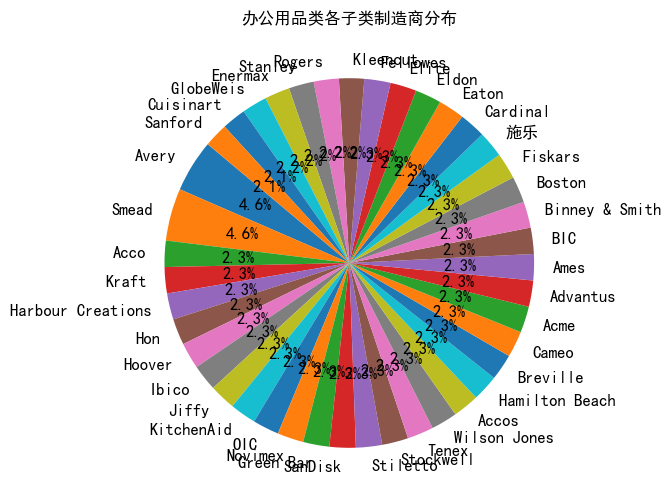

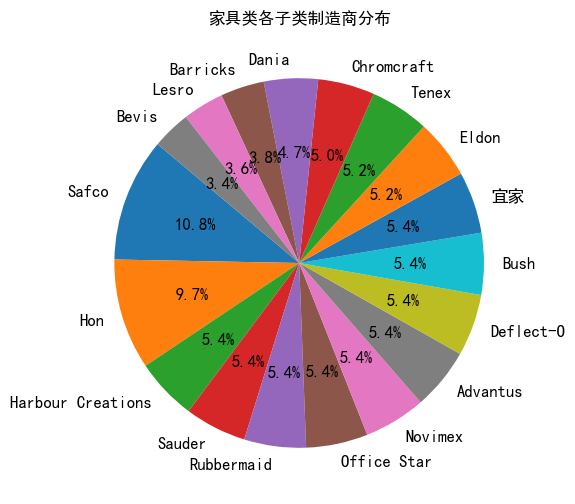

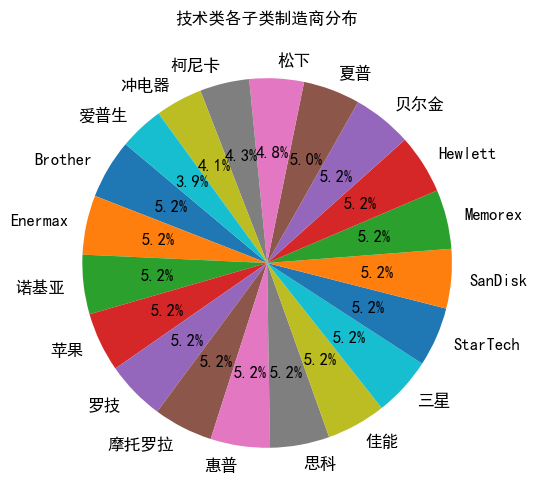